In [2]:
import torch

# Example: your model logits (batch output)
y_pred = torch.randn(32, 3, 224, 224)

# Convert logits to probabilities
probs = torch.sigmoid(y_pred)

print("Predicted probabilities stats:")
print("Min:", probs.min().item())
print("Max:", probs.max().item())
print("Mean:", probs.mean().item())


Predicted probabilities stats:
Min: 0.005945486482232809
Max: 0.9950401186943054
Mean: 0.5000606775283813


In [3]:
# Example masks (should be float, values 0 or 1)
yb = torch.randint(0, 2, (32, 3, 224, 224)).float()

# Compute per-pixel loss
loss_map = torch.clamp(y_pred, min=0) - y_pred * yb + torch.log1p(torch.exp(-torch.abs(y_pred)))

# Check stats
print("Per-pixel loss stats:")
print("Min:", loss_map.min().item())
print("Max:", loss_map.max().item())
print("Mean:", loss_map.mean().item())


Per-pixel loss stats:
Min: 0.004972255788743496
Max: 5.125123023986816
Mean: 0.8061272501945496


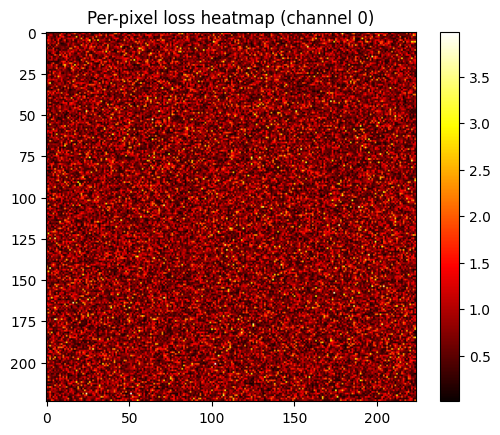

In [4]:
import matplotlib.pyplot as plt

# Pick one image and one channel
example_loss = loss_map[0, 0]  # first image, first channel

plt.imshow(example_loss.detach().cpu(), cmap="hot")
plt.colorbar()
plt.title("Per-pixel loss heatmap (channel 0)")
plt.show()


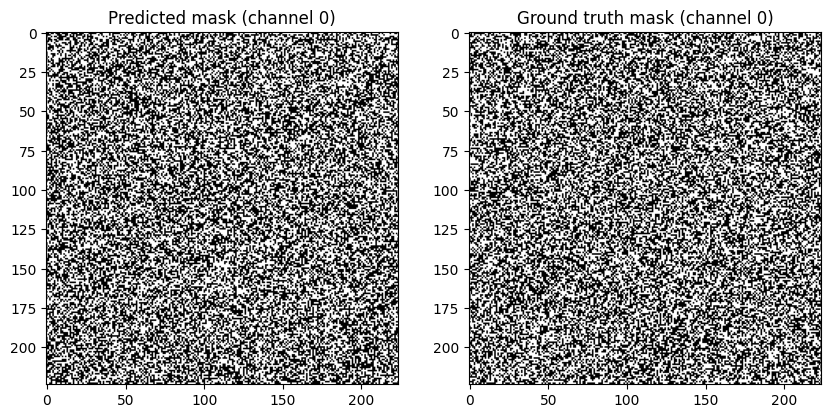

In [5]:
pred_mask = (probs[0, 0] > 0.5).float()
true_mask = yb[0, 0]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(pred_mask.cpu(), cmap="gray")
axs[0].set_title("Predicted mask (channel 0)")

axs[1].imshow(true_mask.cpu(), cmap="gray")
axs[1].set_title("Ground truth mask (channel 0)")

plt.show()
